# -------------------------------NEURAL-NETWORKS-----------------------------------

## Imports

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np
import csv
from ipykernel import kernelapp as app
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing, cross_validation

In [6]:
loan_df = pd.read_csv('/Users/sonalichaudhari/Desktop/Loan.csv', low_memory=False) 
decline_df= pd.read_csv(open('/Users/sonalichaudhari/Desktop/Decline.csv','rU'), encoding='utf-8')
loan_df=loan_df[['id','loan_amnt', 'purpose', 'fico', 'dti','zip_code', 'State', 'emp_length', 'Year', 'Month', 'approval']]
decline_df =decline_df[['id','loan_amnt','purpose', 'fico', 'dti','zip_code', 'State', 'emp_length', 'Year', 'Month','approval']]

In [7]:
decline_df=decline_df[decline_df.dti>-1]
d= decline_df[:1640753]
l = loan_df[:1640753]
l.shape

(1640753, 11)

In [8]:
com = pd.concat([d,l])
com.shape

(3281506, 11)

## Cross Validation for splitting the data in train and test sets

In [9]:
# columns to consider
cols = ['loan_amnt','emp_length','fico','dti','State','purpose']

In [10]:
X = com[cols]
y = com['approval']

In [11]:
#Flatten y into a 1-D array
y = np.ravel(y)

In [12]:
# Splitting the data
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y,test_size=0.30)

In [13]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
Converting the categorical data to numeric 
X_train['pur'] = label_encoder.fit_transform(X_train['purpose'])
X_test['pur'] = label_encoder.fit_transform(X_test['purpose'])

X_train['state'] = label_encoder.fit_transform(X_train['State'])
X_test['state'] = label_encoder.fit_transform(X_test['State'])

In [14]:
X_train = X_train._get_numeric_data()
X_test = X_test._get_numeric_data()

In [15]:
X_train.head()

,loan_amnt,emp_length,fico,dti
1311214,6000.0,4,762.0,13.65
1146831,2500.0,0,515.0,10.97
1467930,20000.0,0,657.0,23.53
288584,35000.0,0,680.0,2.00
326521,17000.0,0,527.0,21.87


In [16]:
# Creating the model
nn = MLPClassifier(hidden_layer_sizes=(50,20,5),max_iter=20,verbose=False)
nn.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 20, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=20, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [17]:
accuracy = nn.score(X_train, y_train)
print(accuracy)

0.903920848182


In [18]:
#Run the model on the test set
y_pred = nn.predict(X_test)

In [19]:
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [20]:
# Predict the values for test and train using the model
y_test_predicted = nn.predict(X_test)
y_train_predicted= nn.predict(X_train)

In [26]:
#Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[429825  61969]
 [ 32151 460507]]


In [21]:
# Caluclate the rms and mae values
mae_train = mean_absolute_error(y_train, y_train_predicted)
mae_test = mean_absolute_error(y_test, y_test_predicted)
rms_train = mean_squared_error(y_train, y_train_predicted)
rms_test = mean_squared_error(y_test, y_test_predicted)
print('MAE_train:' ,mae_train)
print('MAE_test:',mae_test)
print('RMS_train:',rms_train)
print('RMS_test:',rms_test)

MAE_train: 0.0960791518179
MAE_test: 0.0956064897019
RMS_train: 0.0960791518179
RMS_test: 0.0956064897019


In [24]:
#Compute FPR and TPR
from sklearn.metrics import roc_curve
preds = nn.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, preds)

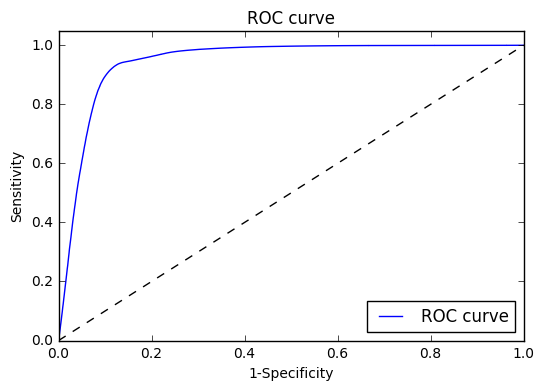

In [25]:
#Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()